# A/B test

A/B test is a controlled experiment designed to compare two versions of a variable or treatment, often referred to as the "A" version (the control) and the "B" version (the variant), to determine which one performs better according to a predefined metric, such as conversion rate, user engagement, or sales. In this experiment, users or subjects are randomly divided into two distinct groups, ensuring that each group receives one of the versions, and the outcomes are measured and compared. The purpose of an A/B test is to identify the most effective approach or treatment, based on data-driven insights, to optimize processes, improve performance, or guide strategic decisions. The randomization of subjects helps eliminate biases and ensures that the results are statistically valid and reliable.


In this A/B test, the primary objective of the analysis is to compare the two groups in terms of the frequency and distribution of key variables, such as the number of impressions, clicks, conversions, and other relevant metrics. The goal is to determine whether the differences observed between the control and test groups are statistically significant, providing insights into the effectiveness of the marketing strategies applied to each group. This analysis uses a well-known A/B test dataset sourced from Kaggle, which includes various performance indicators across multiple campaigns, allowing for a comprehensive evaluation of the factors influencing the campaign outcomes. By applying statistical methods, such as hypothesis testing and comparison of means, we aim to validate the hypothesis and draw actionable conclusions for marketing decision-making.

In [277]:
import kagglehub
import os
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Download the Kaggle dataset
path = kagglehub.dataset_download("amirmotefaker/ab-testing-dataset")
print("Path to dataset files:", path)

# Print the list of files in the downloaded directory
files = os.listdir(path)
print("Csv files:", files)

path1 = os.path.join(path,'control_group.csv')
path2 = os.path.join(path,'test_group.csv')

control_group = pd.read_csv(path1, sep=';')
test_group = pd.read_csv(path2, sep=';')


Path to dataset files: /root/.cache/kagglehub/datasets/amirmotefaker/ab-testing-dataset/versions/1
Csv files: ['control_group.csv', 'test_group.csv']


## Data preprocessing

Data preprocessing is a crucial step in data analysis. If we don't perform proper data preprocessing, the results will be meaningless. First, I renamed each column, corrected the 'date' column, and replaced any null values with the average value.

In [276]:
control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
# first Rename columns
columns = ['group', 'date', 'cost', 'impression_count', 'reach_count', 'click_count',
           'search_count', 'view_count', 'cart_add_count', 'purchase_count']
control_group.columns = columns
test_group.columns = columns

# Check
print(control_group.columns)
print(test_group.columns)

Index(['group', 'date', 'cost', 'impression_count', 'reach_count',
       'click_count', 'search_count', 'view_count', 'cart_add_count',
       'purchase_count'],
      dtype='object')
Index(['group', 'date', 'cost', 'impression_count', 'reach_count',
       'click_count', 'search_count', 'view_count', 'cart_add_count',
       'purchase_count'],
      dtype='object')


In [279]:
control_group['date'] = pd.to_datetime(control_group['date'], dayfirst=True)
test_group['date'] = pd.to_datetime(test_group['date'], dayfirst=True)

print('control:', control_group['date'].dtype)
print('test:', test_group['date'].dtype)

control: datetime64[ns]
test: datetime64[ns]


In [280]:
control_group.isna().sum()

,0
group,0
date,0
cost,0
impression_count,1
reach_count,1
click_count,1
search_count,1
view_count,1
cart_add_count,1
purchase_count,1


In [281]:
test_group.isna().sum()

,0
group,0
date,0
cost,0
impression_count,0
reach_count,0
click_count,0
search_count,0
view_count,0
cart_add_count,0
purchase_count,0


In [282]:
control_group['impression_count'] = control_group['impression_count'].fillna(control_group['impression_count'].mean())
control_group['reach_count'] = control_group['reach_count'].fillna(control_group['reach_count'].mean())
control_group['click_count'] = control_group['click_count'].fillna(control_group['click_count'].mean())
control_group['search_count'] = control_group['search_count'].fillna(control_group['search_count'].mean())
control_group['view_count'] = control_group['view_count'].fillna(control_group['view_count'].mean())
control_group['cart_add_count'] = control_group['cart_add_count'].fillna(control_group['cart_add_count'].mean())
control_group['purchase_count'] = control_group['purchase_count'].fillna(control_group['purchase_count'].mean())

In [283]:
control_group.isna().sum()

,0
group,0
date,0
cost,0
impression_count,0
reach_count,0
click_count,0
search_count,0
view_count,0
cart_add_count,0
purchase_count,0


## Exploratory data analysis

In this section, I visualize the sum, average, and outliers of each variable by creating box plots.

### Visualize summary_statistics

In [284]:
#Check the data types of each column in the DataFrame
print(control_group.dtypes)
print(test_group.dtypes)

group                       object
date                datetime64[ns]
cost                         int64
impression_count           float64
reach_count                float64
click_count                float64
search_count               float64
view_count                 float64
cart_add_count             float64
purchase_count             float64
dtype: object
group                       object
date                datetime64[ns]
cost                         int64
impression_count             int64
reach_count                  int64
click_count                  int64
search_count                 int64
view_count                   int64
cart_add_count               int64
purchase_count               int64
dtype: object


In [239]:
# Since the 'group' column is of object type, drop it along with the 'date' column and then run describe
control_clean = control_group.drop(columns=['group', 'date'])
test_clean = test_group.drop(columns=['group', 'date'])

# Now, running describe() will display only numeric columns
control_summary = control_clean.describe()
test_summary = test_clean.describe()

In [240]:
control_summary

,cost,impression_count,reach_count,click_count,search_count,view_count,cart_add_count,purchase_count
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21311.695472,21452.627592,1726.803732,851.025795,764.021907,400.371207,181.810508
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,95191.250000,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000
50%,2299.500000,112368.000000,91418.000000,5272.396552,2340.000000,1979.500000,1319.500000,506.000000
75%,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [241]:
test_summary

,cost,impression_count,reach_count,click_count,search_count,view_count,cart_add_count,purchase_count
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


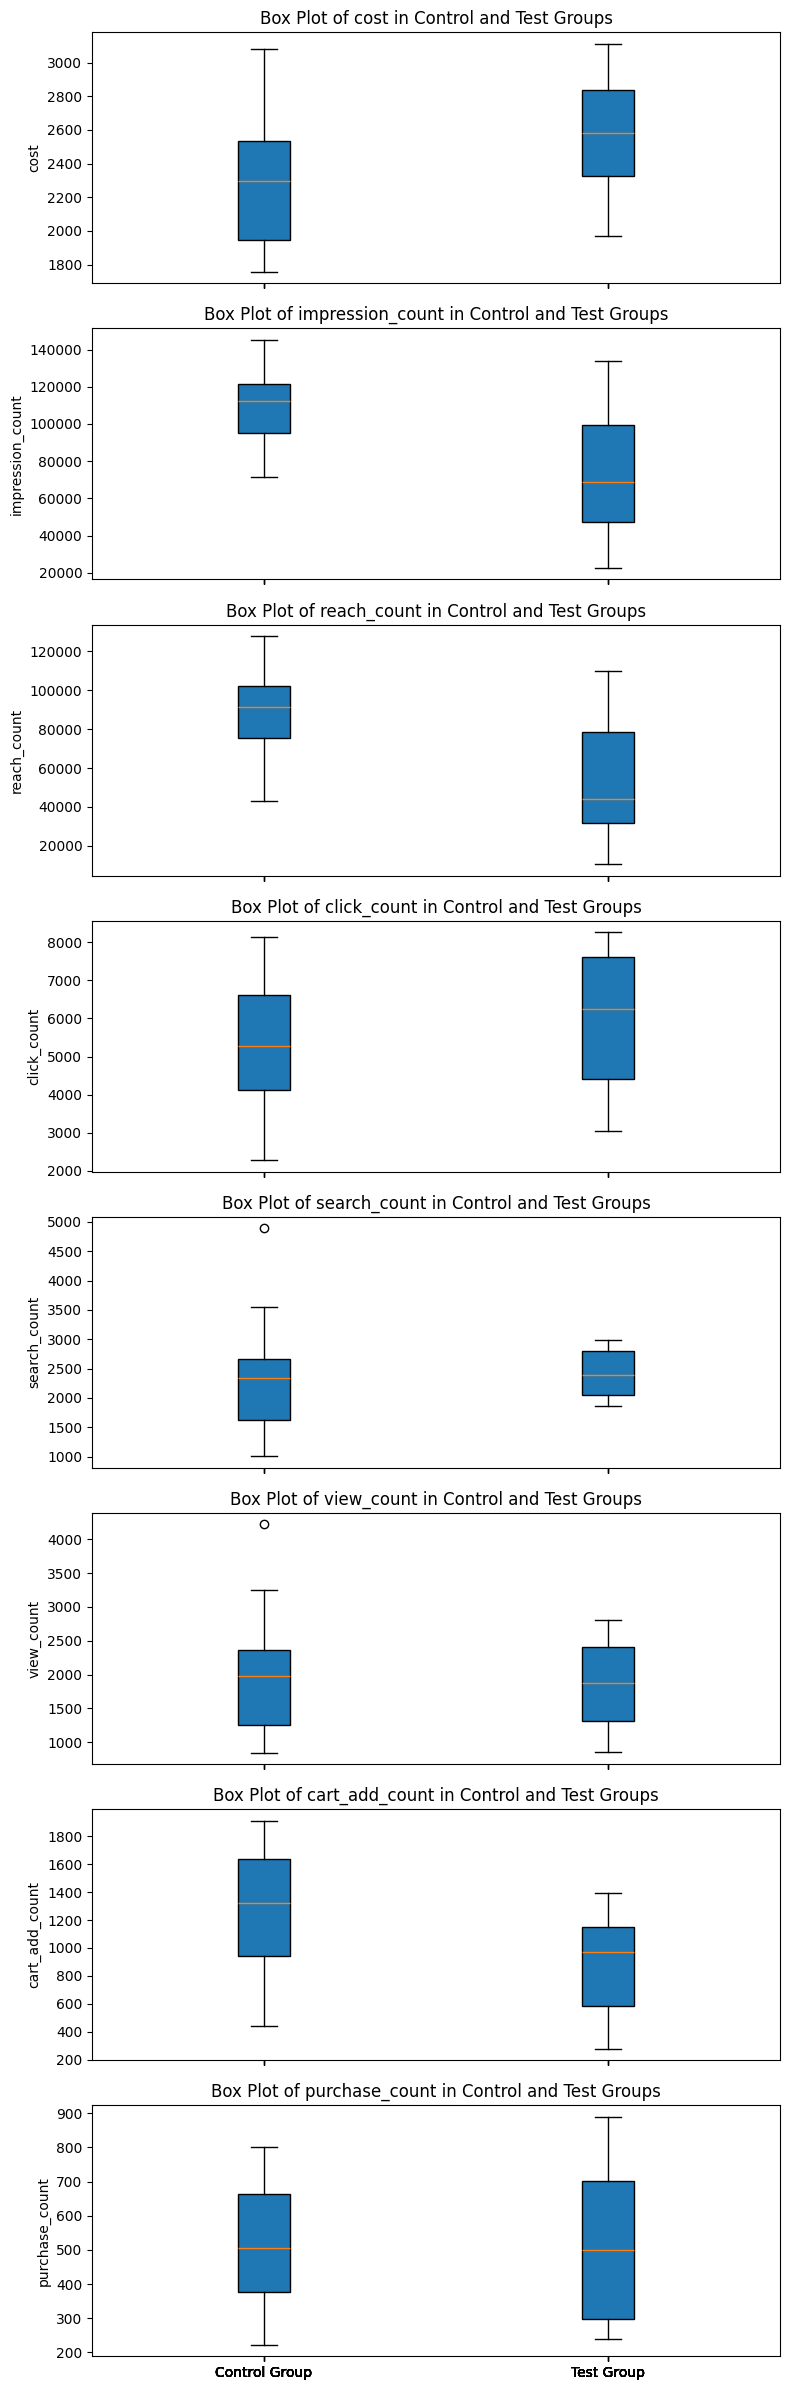

In [242]:
import matplotlib.pyplot as plt

# Draw box plots for each variable in Control Group and Test Group
num_vars = len(control_clean.columns)  # Number of variables
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(8, 3 * num_vars), sharex=True)

# Create box plots for each variable
for i, var in enumerate(control_clean.columns):
    # Merge the data of Control Group and Test Group to create the box plot
    data = [control_clean[var], test_clean[var]]

    axes[i].boxplot(data, labels=['Control Group', 'Test Group'], patch_artist=True)
    axes[i].set_title(f"Box Plot of {var} in Control and Test Groups")
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()


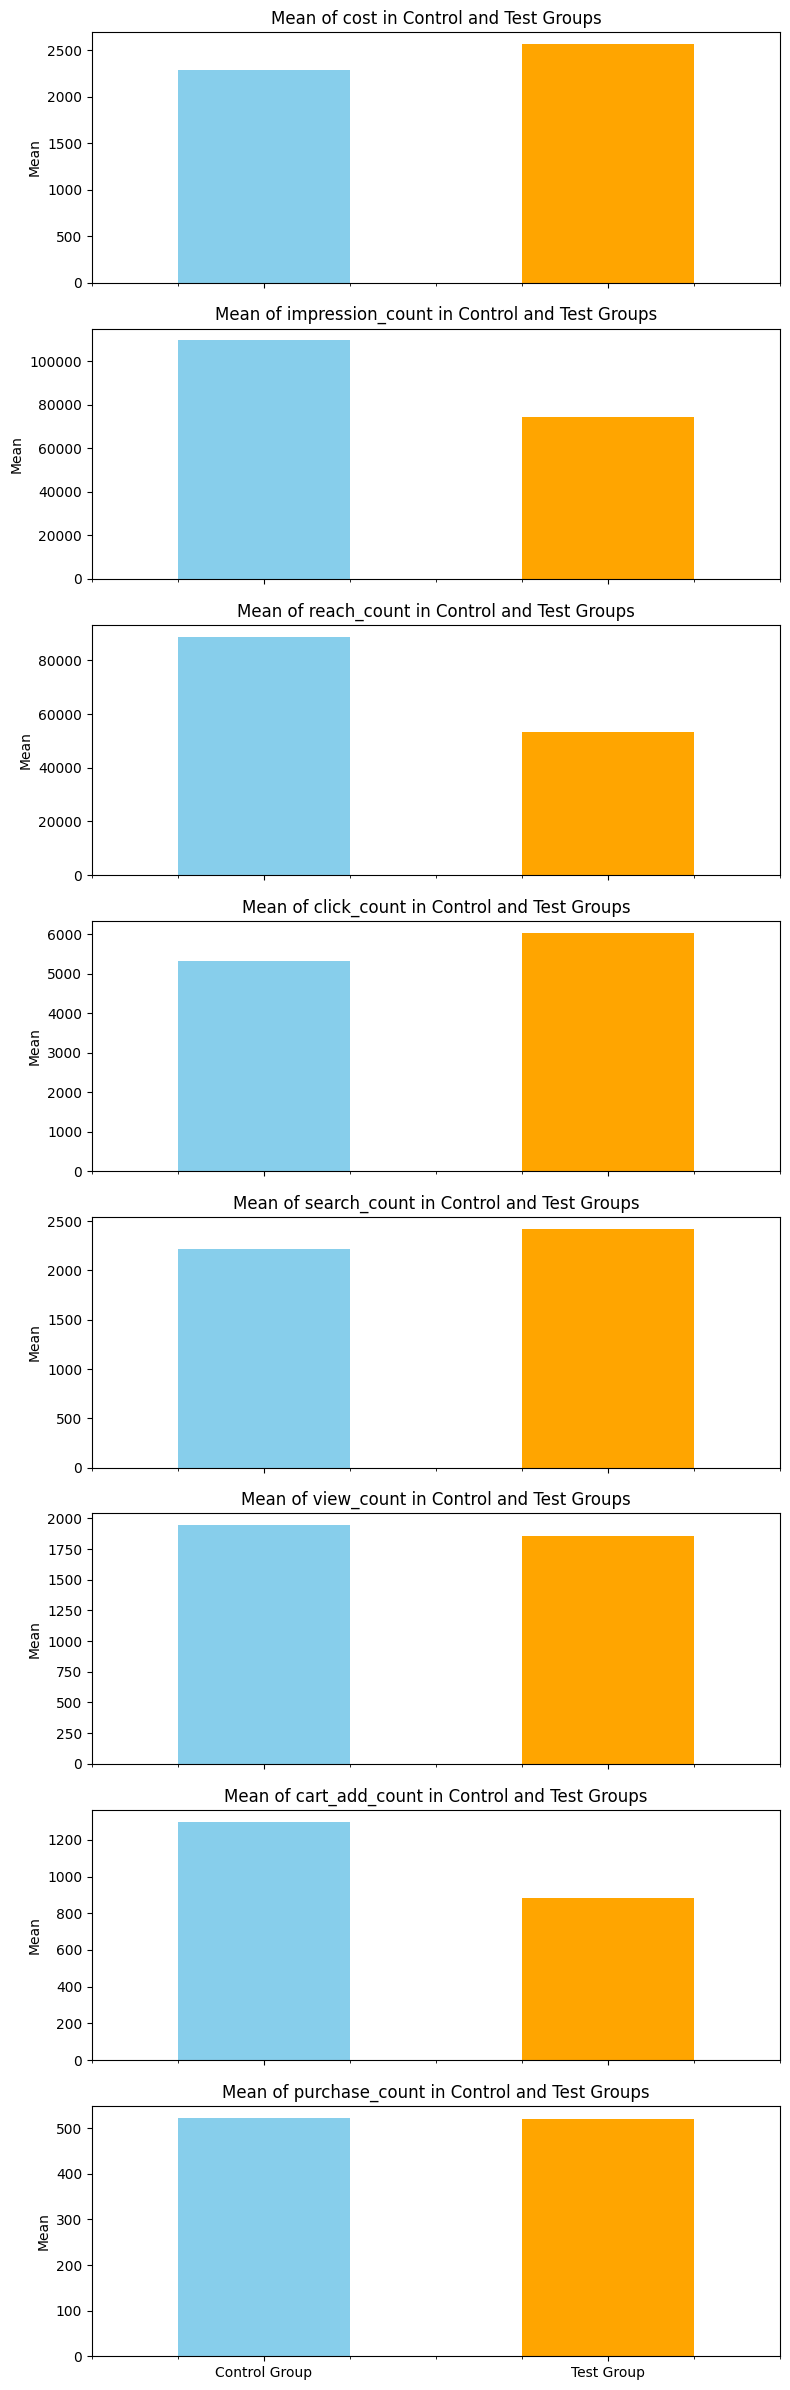

In [243]:
# Calculate the mean for each variable, excluding 'date' and 'group'
control_means = control_clean.mean()
test_means = test_clean.mean()

# Combine the means into a DataFrame for easier iteration
comparison_means_df = pd.DataFrame({'Control Group Mean': control_means, 'Test Group Mean': test_means})

# Set up the subplots
num_vars = len(comparison_means_df)
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(8, 3 * num_vars), sharex=True)

# Plot each variable in a separate subplot
for i, var in enumerate(comparison_means_df.index):
    comparison_means_df.loc[var].plot(kind='bar', ax=axes[i], color=['skyblue', 'orange'])
    axes[i].set_title(f"Mean of {var} in Control and Test Groups")
    axes[i].set_ylabel("Mean")
    axes[i].set_xticklabels(['Control Group', 'Test Group'], rotation=0)

plt.tight_layout()
plt.show()



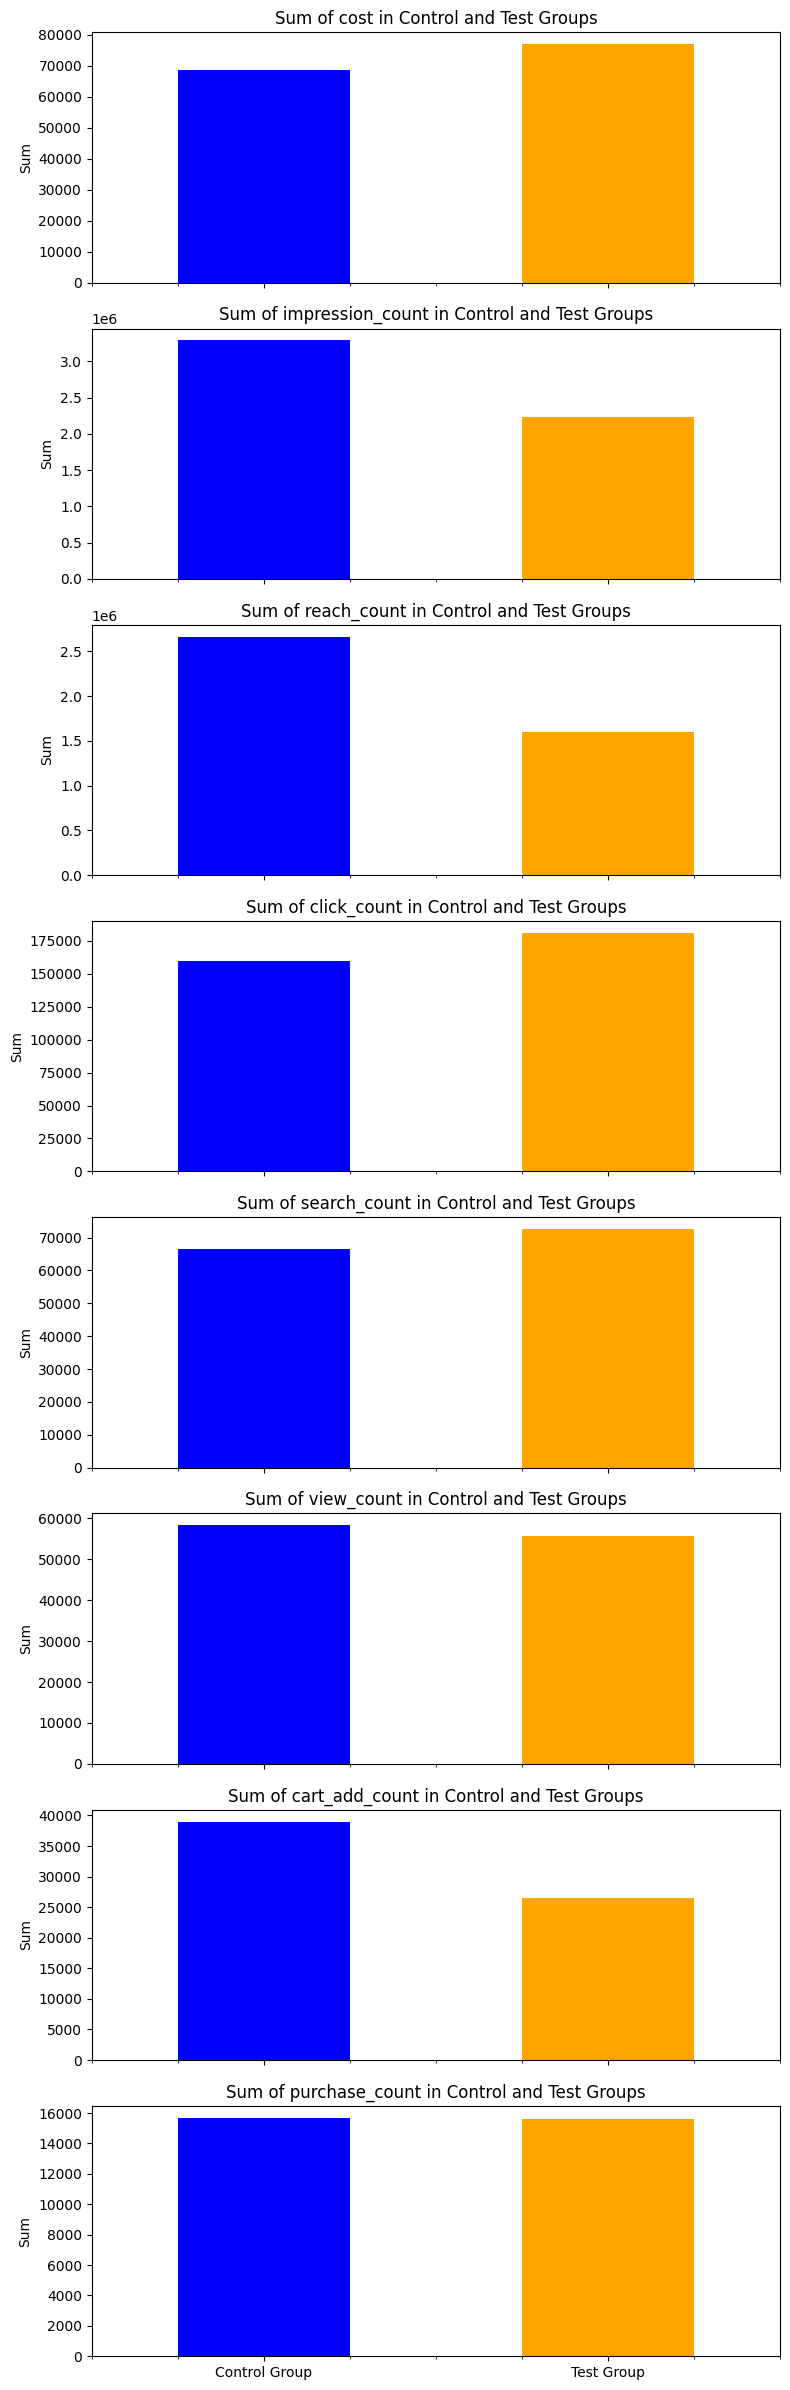

In [244]:
# Calculate the sum for each variable, excluding 'date' and 'group'
control_sums = control_clean.sum()
test_sums = test_clean.sum()

# Combine the sums into a DataFrame for easier iteration
comparison_df = pd.DataFrame({'Control Group': control_sums, 'Test Group': test_sums})

# Set up the subplots
num_vars = len(comparison_df)
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(8, 3 * num_vars), sharex=True)

# Plot each variable in a separate subplot
for i, var in enumerate(comparison_df.index):
    comparison_df.loc[var].plot(kind='bar', ax=axes[i], color=['blue', 'orange'])
    axes[i].set_title(f"Sum of {var} in Control and Test Groups")
    axes[i].set_ylabel("Sum")
    axes[i].set_xticklabels(['Control Group', 'Test Group'], rotation=0)

plt.tight_layout()
plt.show()

## Checking Normality for Each Variable

In this section, I checked the normality of each variable by performing the Shapiro-Wilk test and Levene's test for both groups. Based on the results, I found that I can perform the t-test for the view count and reach count


In [245]:
from scipy import stats

# List of variables to check for normality and equal variance
variables = ['impression_count', 'reach_count', 'click_count', 'search_count', 'view_count', 'cart_add_count', 'purchase_count','cost']

# Loop through each variable and perform the Shapiro-Wilk test for normality and Levene's test for equal variances
for var in variables:
    control_data = control_group[var]
    test_data = test_group[var]

    # Shapiro-Wilk test for normality
    control_stat, control_p = stats.shapiro(control_data)
    test_stat, test_p = stats.shapiro(test_data)

    print(f"{var} - Control Group Normality - W Statistic: {control_stat}, P-value: {control_p}")
    print(f"{var} - Test Group Normality - W Statistic: {test_stat}, P-value: {test_p}")

    # Interpretation for normality
    if control_p > 0.05 and test_p > 0.05:
        print(f"{var}: Both groups follow a normal distribution.")
    else:
        print(f"{var}: At least one group does not follow a normal distribution.")

    # Levene's test for equal variance
    var_stat, var_p = stats.levene(control_data, test_data)
    print(f"{var} - Equal Variance Test (Levene's Test) - Statistic: {var_stat}, P-value: {var_p}")

    # Interpretation for equal variance
    if var_p > 0.05:
        print(f"{var}: Variances are equal between groups.\n")
    else:
        print(f"{var}: Variances are not equal between groups.\n")

impression_count - Control Group Normality - W Statistic: 0.9437122006853682, P-value: 0.11452370456781957
impression_count - Test Group Normality - W Statistic: 0.9484545305279277, P-value: 0.1536675855316964
impression_count: Both groups follow a normal distribution.
impression_count - Equal Variance Test (Levene's Test) - Statistic: 7.754060233281115, P-value: 0.007225907712495474
impression_count: Variances are not equal between groups.

reach_count - Control Group Normality - W Statistic: 0.9740168274197124, P-value: 0.6537947092601243
reach_count - Test Group Normality - W Statistic: 0.9324318945860866, P-value: 0.05699605107347176
reach_count: Both groups follow a normal distribution.
reach_count - Equal Variance Test (Levene's Test) - Statistic: 2.514853842854583, P-value: 0.11821567704023767
reach_count: Variances are equal between groups.

click_count - Control Group Normality - W Statistic: 0.9632073621656805, P-value: 0.373095593451384
click_count - Test Group Normality - W

## A/B Tetsing

In [285]:
from scipy import stats

# Split data for the control and test groups
control_group_clicks = control_group['impression_count']
test_group_clicks = test_group['impression_count']

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(control_group_clicks, test_group_clicks, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation of results
if p_value < 0.05:
    print("The difference between the two groups is statistically significant.")
else:
    print("The difference between the two groups is not statistically significant.")

T-statistic: 4.969499291621205
P-value: 8.136360620352422e-06
The difference between the two groups is statistically significant.


In [286]:
from scipy import stats

# Split data for the control and test groups
control_group_clicks = control_group['reach_count']
test_group_clicks = test_group['reach_count']

# Perform t-test
t_stat, p_value = stats.ttest_ind(control_group_clicks, test_group_clicks)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation of results
if p_value < 0.05:
    print("The difference between the two groups is statistically significant.")
else:
    print("The difference between the two groups is not statistically significant.")


T-statistic: 5.392566808869295
P-value: 1.3332074556983057e-06
The difference between the two groups is statistically significant.


Conclusion of A/B Test (Impression Count and Reach Count):
Impression Count:

Both the Control Group and Test Group follow a normal distribution, as confirmed by the Shapiro-Wilk test.
The Levene's test shows that the variances between the two groups are not equal. As a result, Welch’s t-test was applied.
The p-value from the Welch’s t-test is significantly below 0.05, indicating a statistically significant difference between the groups. The Control Group demonstrated a higher number of impressions than the Test Group.
Reach Count:

Both groups follow a normal distribution, as indicated by the Shapiro-Wilk test.
The Levene's test confirms that the variances between the two groups are equal.
The t-test results suggest a statistically significant difference in reach between the two groups. The Control Group reached more users than the Test Group.
